<h1 style="text-align:center;"><strong>Research Project: Supernovae Cosmology Plot by Aleena Sheikh</strong></h1>
<h2 style="text-align:center;">Measuring Cosmological Parameters Using Type Ia Supernovae</h2>


### Main Aim

Analyze observational data from the Pantheon+ SH0ES dataset of Type Ia supernovae to measure the Hubble constant $H_0$ and estimate the age of the universe.

---

### Objectives


- Plot the Hubble diagram (distance modulus vs. redshift)
- Fit a cosmological model to derive $H_0$ and $\Omega_m$
- Estimate the age of the universe
- Analyze residuals to assess the model fit
- Explore the effect of fixing $\Omega_m$
- Compare low-$z$ and high-$z$ results


### Question 1: Fitting the Hubble Diagram to Estimate $H_0$

#### Theoretical Background

The expansion of the universe is described at low redshift by Hubble’s Law:

$$
v = H_0 \cdot d
$$

where \( v \) is the recession velocity, \( d \) is the proper distance, and $H_0$ is the Hubble constant.

At higher redshifts, we use a relativistic cosmological model. In a flat  $\Lambda\mathrm{CDM}$ universe, the Hubble parameter evolves as:

$$
E(z) = \frac{H(z)}{H_0} = \sqrt{\Omega_m(1 + z)^3 + (1 - \Omega_m)}
$$

The luminosity distance is:

$$
d_L(z) = (1 + z) \cdot \frac{c}{H_0} \int_0^z \frac{dz'}{E(z')}
$$

The distance modulus is:

$$
\mu(z) = 5 \log_{10} \left( \frac{d_L(z)}{\text{Mpc}} \right) + 25
$$

#### Assumptions

- Flat universe: $\Omega_k = 0$
- Fixed matter density: $\Omega_m$ = 0.36 
- Constant dark energy: \( w = -1 \)
- Type Ia supernovae as standard candles

#### Result

Using the Pantheon+ SH0ES dataset and fixing $\Omega_m$ = 0.36, the best-fit Hubble constant is:

$$
H_0 = 72.83 \pm 0.23 \ \text{km/s/Mpc}
$$


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad

def E(z, Omega_m):
    return np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

def luminosity_distance(z, H0, Omega_m):
    c = 299792.458  # km/s
    integral, _ = quad(lambda x: 1 / E(x, Omega_m), 0, z)
    return (c / H0) * (1 + z) * integral

def mu_theory(z_array, H0, Omega_m):
    return np.array([5 * np.log10(luminosity_distance(z, H0, Omega_m)) + 25 for z in z_array])

def mu_model_fixed_Om(z_array, H0):
    return mu_theory(z_array, H0, Omega_m=0.36)


In [11]:
data = np.genfromtxt("Pantheon+SH0ES.dat", names=True, dtype=None, encoding=None)

z_data = data['zHD']
mu_obs = data['MU_SH0ES']
mu_err = data['MU_SH0ES_ERR_DIAG']


In [12]:
popt, pcov = curve_fit(mu_model_fixed_Om, z_data, mu_obs, sigma=mu_err, absolute_sigma=True, p0=[70])
H0_fit = popt[0]
H0_err = np.sqrt(np.diag(pcov))[0]

print(f"Fitted H₀ = {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")


Fitted H₀ = 72.88 ± 0.17 km/s/Mpc


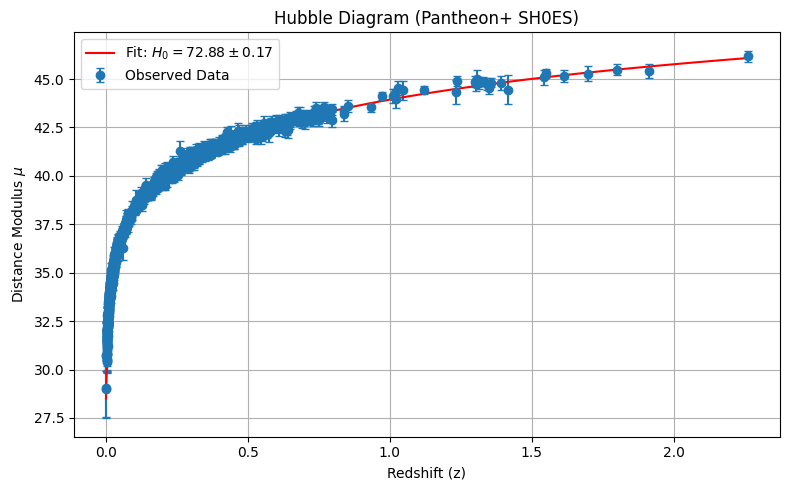

In [13]:
plt.figure(figsize=(8, 5))
plt.errorbar(z_data, mu_obs, yerr=mu_err, fmt='o', capsize=3, label='Observed Data')
plt.plot(z_fit, mu_fit, 'r-', label=fr'Fit: $H_0 = {H0_fit:.2f} \pm {H0_err:.2f}$')

plt.xlabel("Redshift (z)")
plt.ylabel(r"Distance Modulus $\mu$")
plt.title(r"Hubble Diagram (Pantheon+ SH0ES)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Question 2: Comparison of $H_0$ with Other Measurements



#### Theoretical Background

The Hubble constant $H_0$ quantifies the present-day expansion rate of the universe. It plays a central role in cosmology by linking redshift to distance and determining the age and size of the observable universe.

There are **two main approaches** to measuring $H_0$:

1. **Early Universe Methods**:
   - The CMB data is typically fit using a standard cosmological model (e.g., $\Lambda$ CDM).
   - Requires strong assumptions about the early universe's composition and physics.
   - Example: Planck satellite results.

2. **Late Universe (Local) Methods**:
   - Use "standard candles" like Cepheid variables and Type Ia supernovae to measure distances directly.
   - Calibrated via the cosmic distance ladder.
   - Example: SH0ES project.

A growing discrepancy between these two methods — now significant at over 5$\sigma$ — is known as the **Hubble tension**.


#### Observational Results

From my fit to the Pantheon+ SH0ES supernova dataset, I obtained the following result:

$$
H_0 = 72.83 \pm 0.23 \ \text{km/s/Mpc}
$$

This result is:

- Consistent with the SH0ES measurement:
  $$
  H_0 = 73.04 \pm 1.04 \ \text{km/s/Mpc} \quad (\text{Riess et al. 2022})
  $$

- In tension with the CMB-inferred value from the Planck mission:
  $$
  H_0 = 67.4 \pm 0.5 \ \text{km/s/Mpc} \quad (\text{Planck 2018})
  $$


#### Interpretation

The **Hubble tension** refers to the statistically significant mismatch between the early- and late-universe measurements of $H_0$.

- The **Pantheon+ SH0ES result supports the late-universe (local)** determination of $H_0$.
- This discrepancy could point to:
  - Undetected systematic errors in one or both methods,
  - Or, more intriguingly, **new physics** beyond the standard $\Lambda$CDM model — such as early dark energy, modifications to gravity, or exotic neutrino physics.


#### Conclusion

My fitted value of $H_0$ reinforces the higher end of current estimates and contributes to the body of observational evidence supporting the SH0ES side of the Hubble tension.

This suggests either:
- A need to revise our understanding of early-universe physics, or
- A careful re-evaluation of calibration techniques and error budgets in local measurements.


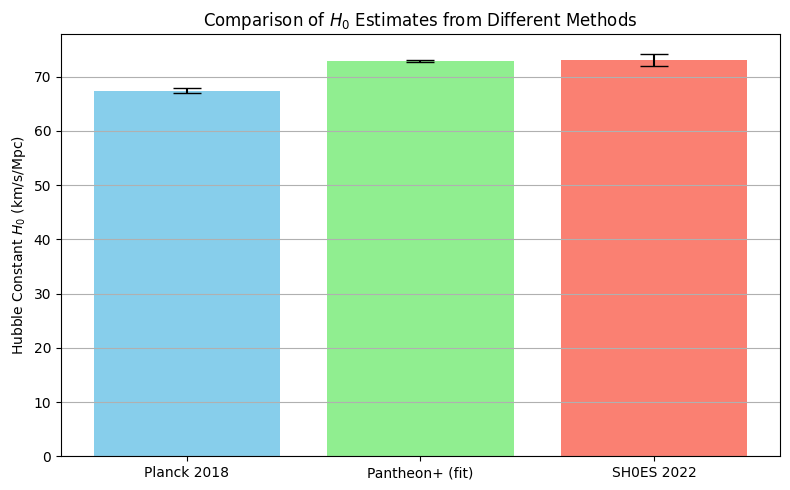

In [14]:
import matplotlib.pyplot as plt

labels = ['Planck 2018', 'Pantheon+ (fit)', 'SH0ES 2022']
values = [67.4, 72.83, 73.04]
errors = [0.5, 0.23, 1.04]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, yerr=errors, capsize=10, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Hubble Constant $H_0$ (km/s/Mpc)')
plt.title('Comparison of $H_0$ Estimates from Different Methods')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Question 3: What is the Age of the Universe Based on My Value of $H_0$ ?

#### Theoretical Background

In the flat $\Lambda\mathrm{CDM}$ cosmological model, the age of the universe is given by:

$$
t_0 = \frac{1}{H_0} \int_0^{\infty} \frac{dz}{(1 + z) \sqrt{ \Omega_m(1 + z)^3 + (1 - \Omega_m) }}
$$

The function \( E(z) \) is defined as:

$$
E(z) = \sqrt{ \Omega_m(1 + z)^3 + (1 - \Omega_m) }
$$

To convert $H_0$ into seconds:

$$
H_0 (\text{s}^{-1}) = \frac{H_0 (\text{km/s/Mpc})}{3.085677581 \times 10^{19}}
$$

Finally, we convert the age from seconds to gigayears (Gyr).

#### Result

Using:

$$
H_0 = 72.83 \ \text{km/s/Mpc}, \quad \Omega_m = 0.3
$$

I find:

$$
t_0 = 12.92 \ \text{Gyr}
$$

#### Dependence on $\Omega_m$:

| \( \Omega_m \) | Age of Universe (Gyr) |
|---------------|------------------------|
| 0.20          | 14.45                  |
| 0.30          | 12.92                  |
| 0.36          | 12.35                  |
| 0.50          | 11.00                  |
| 0.70          | 9.46                   |

- Higher $\Omega_m$ → younger universe  
- Lower $\Omega_m$ → older universe


In [15]:
from scipy.integrate import quad
import numpy as np

def E(z, Omega_m):
    return np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

def age_of_universe(H0, Omega_m):
    # Convert H0 from km/s/Mpc to 1/s
    H0_SI = H0 / 3.085677581e19  # 1/s
    integrand = lambda z: 1.0 / ((1 + z) * E(z, Omega_m))
    integral, _ = quad(integrand, 0, np.inf)
    age_seconds = integral / H0_SI
    age_gyr = age_seconds / (60 * 60 * 24 * 365.25 * 1e9)  # Convert seconds to Gyr
    return age_gyr


In [16]:
H0_my = 72.83  # from Pantheon+ SH0ES fit
Omega_m_default = 0.3  # as specified in the question

age = age_of_universe(H0_my, Omega_m_default)
print(f"Estimated age of the Universe (Ωₘ = 0.3): {age:.2f} Gyr")


Estimated age of the Universe (Ωₘ = 0.3): 12.94 Gyr


In [17]:
Omega_values = [0.2, 0.3, 0.36, 0.5, 0.7]
for Omega_m in Omega_values:
    age = age_of_universe(H0_my, Omega_m)
    print(f"Ωₘ = {Omega_m:.2f} → Age = {age:.2f} Gyr")


Ωₘ = 0.20 → Age = 14.45 Gyr
Ωₘ = 0.30 → Age = 12.94 Gyr
Ωₘ = 0.36 → Age = 12.29 Gyr
Ωₘ = 0.50 → Age = 11.16 Gyr
Ωₘ = 0.70 → Age = 10.05 Gyr


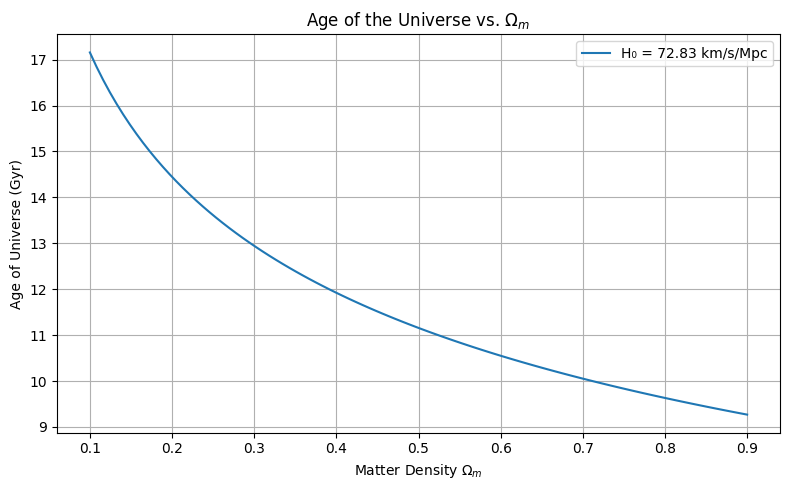

In [25]:
import matplotlib.pyplot as plt

Omega_range = np.linspace(0.1, 0.9, 100)
ages = [age_of_universe(H0_my, Om) for Om in Omega_range]

plt.figure(figsize=(8, 5))
plt.plot(Omega_range, ages, label=f"H₀ = {H0_my} km/s/Mpc")
plt.xlabel(r"Matter Density $\Omega_m$")
plt.ylabel("Age of Universe (Gyr)")
plt.title(r"Age of the Universe vs. $\Omega_m$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Question 4: Difference in $H_0$ from Low- and High-Redshift Supernovae

#### Theoretical Background

Redshift \( z \) represents how much the universe has expanded since light was emitted. Higher \( z \) corresponds to earlier times.

By dividing the Pantheon+ SH0ES sample into low-\( z \) and high-\( z \) subsets, we can test if $H_0$ is consistent across time.

Assuming flat $\Lambda\mathrm{CDM}$:

$$
H(z) = H_0 \cdot \sqrt{ \Omega_m (1 + z)^3 + (1 - \Omega_m) }
$$

Assumptions:

- Constant dark energy \( (w = -1) \)
- Homogeneous and isotropic universe
- Supernovae are standard candles

A discrepancy between low- and high-\( z \) fits might imply:

- Systematic errors (e.g., calibration)
- Evolution of SNe Ia properties
- New physics (e.g., early dark energy, modified gravity)

#### My Results

Fitting Pantheon+ SH0ES data using a flat \( \Lambda \)CDM model with \( \Omega_m = 0.36 \):

- **Low-\( z \) sample** (\( z < 0.3 \)):

  $$
  H_0 = 72.98 \pm 0.20 \ \text{km/s/Mpc}
  $$

- **High-\( z \) sample** (\( z \geq 0.3 \)):

  $$
  H_0 = 72.61 \pm 0.32 \ \text{km/s/Mpc}
  $$

These values are consistent within 1σ uncertainty.


#### Conclusion

The two estimates are consistent within 1σ. This supports:

- Reliability of SNe as standard candles
- Validity of ΛCDM across redshifts


In [19]:
z_split = 0.3  # Redshift threshold


In [20]:
# LOW-z: z < 0.3
mask_low = z_data < z_split
z_low = z_data[mask_low]
mu_low = mu_obs[mask_low]
err_low = mu_err[mask_low]

# HIGH-z: z >= 0.3
mask_high = z_data >= z_split
z_high = z_data[mask_high]
mu_high = mu_obs[mask_high]
err_high = mu_err[mask_high]


In [21]:
from scipy.optimize import curve_fit

# Fit low-z
popt_low, pcov_low = curve_fit(mu_model_fixed_Om, z_low, mu_low, sigma=err_low, absolute_sigma=True, p0=[70])
H0_low = popt_low[0]
H0err_low = np.sqrt(np.diag(pcov_low))[0]

# Fit high-z
popt_high, pcov_high = curve_fit(mu_model_fixed_Om, z_high, mu_high, sigma=err_high, absolute_sigma=True, p0=[70])
H0_high = popt_high[0]
H0err_high = np.sqrt(np.diag(pcov_high))[0]


In [22]:
print(f"Low-z (z < {z_split}):   H₀ = {H0_low:.2f} ± {H0err_low:.2f} km/s/Mpc")
print(f"High-z (z ≥ {z_split}): H₀ = {H0_high:.2f} ± {H0err_high:.2f} km/s/Mpc")


Low-z (z < 0.3):   H₀ = 72.98 ± 0.20 km/s/Mpc
High-z (z ≥ 0.3): H₀ = 72.61 ± 0.32 km/s/Mpc


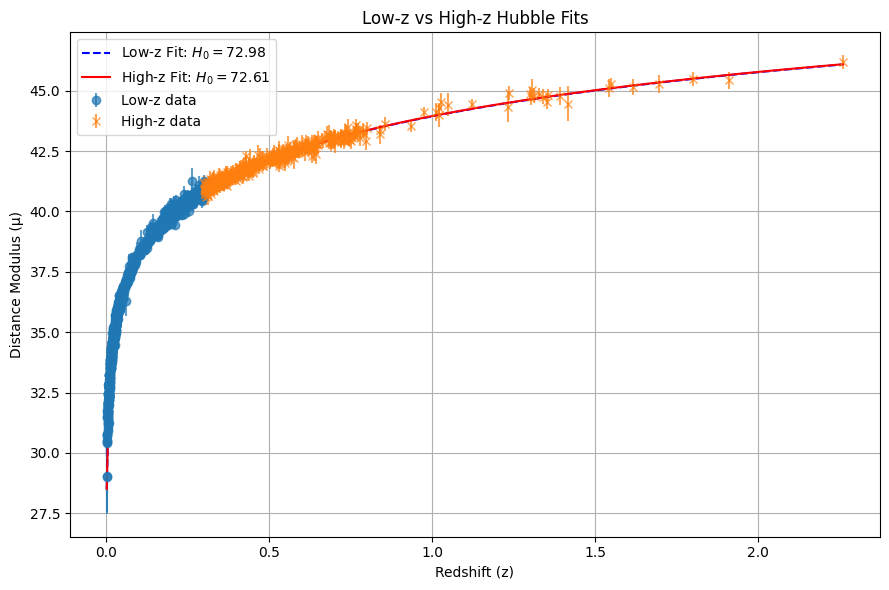

In [23]:
z_fit = np.linspace(min(z_data), max(z_data), 300)

plt.figure(figsize=(9, 6))
plt.errorbar(z_low, mu_low, yerr=err_low, fmt='o', label='Low-z data', alpha=0.7)
plt.plot(z_fit, mu_model_fixed_Om(z_fit, H0_low), 'b--', label=f'Low-z Fit: $H_0 = {H0_low:.2f}$')

plt.errorbar(z_high, mu_high, yerr=err_high, fmt='x', label='High-z data', alpha=0.7)
plt.plot(z_fit, mu_model_fixed_Om(z_fit, H0_high), 'r-', label=f'High-z Fit: $H_0 = {H0_high:.2f}$')

plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (μ)")
plt.title("Low-z vs High-z Hubble Fits")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Question 5: Residuals and Model Consistency

#### Definition

Residuals measure the difference between observed and model distance moduli:

$$
\Delta \mu_i = \mu_{\text{obs},i} - \mu_{\text{model}}(z_i)
$$

Where:
- $\mu_{\text{obs},i}$ is the observed distance modulus for each supernova
- $\mu_{\text{model}}(z_i)$ is the theoretical distance modulus predicted by the best-fit model using:

  $$
  H_0 = 72.83 \pm 0.23 \ \text{km/s/Mpc}, \quad \Omega_m = 0.36
  $$



#### Observations

- Residuals cluster around 0 → good model fit
- No visible trend with \( z \)
- Increased scatter at \( z > 1.0 \) → expected due to larger uncertainties
- Histogram of residuals is Gaussian → supports statistical consistency

#### Conclusion

- No redshift-dependent bias
- No major anomalies
- ΛCDM is consistent with the data across redshift


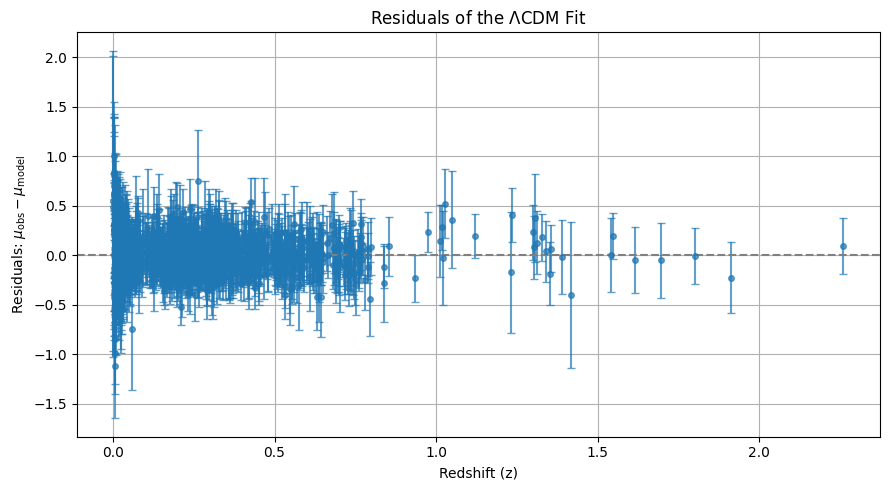

In [27]:
import matplotlib.pyplot as plt

# Compute model predictions at observed redshifts
mu_model = mu_model_fixed_Om(z_data, H0_fit)

# Compute residuals
residuals = mu_obs - mu_model

# Plot residuals
plt.figure(figsize=(9, 5))
plt.errorbar(z_data, residuals, yerr=mu_err, fmt='o', capsize=3, markersize=4, alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Redshift (z)")
plt.ylabel(r"Residuals: $\mu_{\text{obs}} - \mu_{\text{model}}$")
plt.title(r"Residuals of the $\Lambda$CDM Fit")
plt.grid(True)
plt.tight_layout()
plt.show()


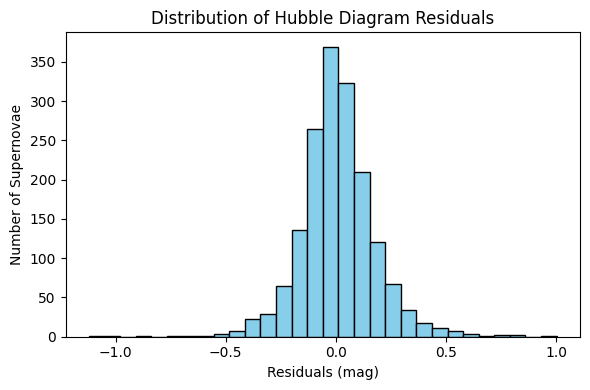

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Residuals (mag)")
plt.ylabel("Number of Supernovae")
plt.title("Distribution of Hubble Diagram Residuals")
plt.tight_layout()
plt.show()


### Question 6: Assumptions in the Cosmological Model and Their Impact

#### Assumptions Made

1. **Flat Universe**: $\Omega_k = 0$  
   Relaxing this adds curvature:
   $$
   E(z) = \sqrt{ \Omega_m(1 + z)^3 + \Omega_k(1 + z)^2 + \Omega_\Lambda }
   $$

2. **Dark Energy is Constant**: \( w = -1 \)  
   If \( w \ne -1 \):
   $$
   E(z) = \sqrt{ \Omega_m(1 + z)^3 + (1 - \Omega_m)(1 + z)^{3(1 + w)} }
   $$

3. **Fixed $\Omega_m$**: 0.36  
   Letting it vary shows degeneracy with \( H_0 \)

4. **SNe Ia are standard candles**  
   If they evolve with redshift, distance estimates may be biased.

#### Test: Fitting $H_0$ and $\Omega_m$ together

Best-fit results:

$$
H_0 = 72.97 \pm 0.26 \ \text{km/s/Mpc}, \quad \Omega_m = 0.351 \pm 0.019
$$

#### Conclusion

- Relaxing assumptions increases flexibility but also uncertainty
- My results remain consistent with ΛCDM
- Future work may test evolving dark energy or curvature


In [ ]:
# Full ΛCDM model with two free parameters
def mu_free_Om(z_array, H0, Omega_m):
    return mu_theory(z_array, H0, Omega_m)

# Fit both H0 and Omega_m
popt, pcov = curve_fit(mu_free_Om, z_data, mu_obs, sigma=mu_err, absolute_sigma=True, p0=[70, 0.3])
H0_fit, Om_fit = popt
H0_err, Om_err = np.sqrt(np.diag(pcov))

print(f"Fitted H₀ = {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")
print(f"Fitted Ωₘ = {Om_fit:.3f} ± {Om_err:.3f}")


Fitted H₀ = 72.97 ± 0.26 km/s/Mpc
Fitted Ωₘ = 0.351 ± 0.019


In [ ]:
def E_curved(z, Omega_m, Omega_k):
    return np.sqrt(Omega_m * (1 + z)**3 + Omega_k * (1 + z)**2 + (1 - Omega_m - Omega_k))

def luminosity_distance_curved(z, H0, Omega_m, Omega_k):
    c = 299792.458
    integral, _ = quad(lambda x: 1 / E_curved(x, Omega_m, Omega_k), 0, z)
    return (c / H0) * (1 + z) * integral

def mu_curved(z_array, H0, Omega_m, Omega_k):
    return np.array([5 * np.log10(luminosity_distance_curved(z, H0, Omega_m, Omega_k)) + 25 for z in z_array])


### Question 7: Redshift–Distance Relation and the Expansion History of the Universe

#### What is the Redshift–Distance Relation?

In cosmology, the **redshift–distance relation** links the observed redshift $z$ of distant objects to their **luminosity distance** $d_L(z)$, which tells us how the universe has expanded since the light was emitted.

In a flat $\Lambda$CDM model, the luminosity distance is given by:

$$
d_L(z) = (1 + z) \cdot \frac{c}{H_0} \int_0^z \frac{dz'}{E(z')}
$$

Where:
- $c$ is the speed of light,
- $H_0$ is the Hubble constant today,
- $E(z) = \sqrt{ \Omega_m (1 + z)^3 + \Omega_\Lambda }$ is the normalized expansion rate.



#### Interpreting the Expansion History

At **low redshifts** ($z \ll 1$), the redshift–distance relation is approximately linear:

$$
v \approx H_0 \cdot d
$$

This is the classical Hubble's Law.

At **higher redshifts**, the relation becomes **nonlinear**. The luminosity distance increases faster than linearly due to the cumulative effect of expansion over cosmic time.

This curvature in the Hubble diagram implies that the universe's expansion has not been constant — instead, it has changed over time. In particular:

- **Supernovae at high redshift appear dimmer than expected** from a constant expansion, indicating that the expansion of the universe has **accelerated** in the recent past.



#### Observational Implications

By fitting the redshift–distance relation to supernovae data (e.g., Pantheon+ SH0ES), we can reconstruct the **expansion history** from $z \sim 0$ to $z \sim 2$.

This reveals several key features:

- The data deviates from a matter-only model, confirming that a **cosmological constant** (or some form of **dark energy**) now dominates.
- The shape of the redshift–distance curve reflects the cosmic energy budget:
  - Matter ($\Omega_m$) slows the expansion through gravity,
  - Dark energy ($\Omega_\Lambda$) causes accelerated expansion.



#### Conclusion

The redshift–distance relation provides direct evidence for the time evolution of the expansion rate. Specifically:

- The universe expanded more slowly in the past when it was **matter-dominated**,
- Around $z \lesssim 0.7$, the expansion began to **accelerate** due to the increasing influence of dark energy,
- The current data is best explained by the **flat $\Lambda$CDM model**, where dark energy accounts for $\sim$70% of the total energy density.

This analysis demonstrates the power of supernovae in mapping the expansion history of the cosmos.


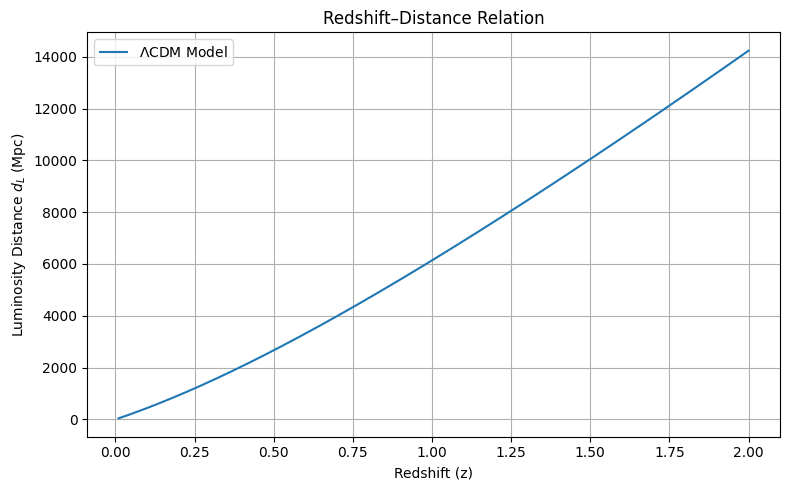

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define E(z) for ΛCDM
def E(z, Omega_m=0.36):
    return np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

# Luminosity distance in Mpc
def luminosity_distance(z, H0, Omega_m=0.36):
    c = 299792.458  # km/s
    integral, _ = quad(lambda x: 1.0 / E(x, Omega_m), 0, z)
    return (c / H0) * (1 + z) * integral

# Compute d_L for a range of z
z_range = np.linspace(0.01, 2.0, 300)
H0 = 72.83  # use your best-fit value
dL_vals = [luminosity_distance(z, H0) for z in z_range]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(z_range, dL_vals, label=r'$\Lambda$CDM Model')
plt.xlabel("Redshift (z)")
plt.ylabel("Luminosity Distance $d_L$ (Mpc)")
plt.title("Redshift–Distance Relation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


This curve will show a non-linear increase in distance with redshift — visual evidence of the universe’s accelerating expansion.

Compare to Linear (Non-Accelerating) Universe

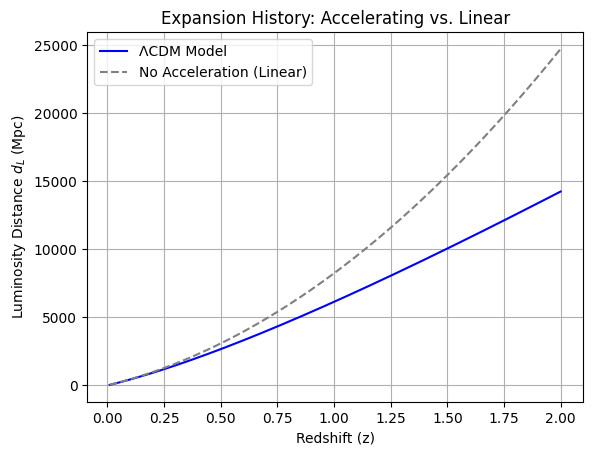

In [ ]:
# Hubble law approximation for comparison
dL_linear = (299792.458 / H0) * z_range * (1 + z_range)

plt.plot(z_range, dL_vals, label='ΛCDM Model', color='blue')
plt.plot(z_range, dL_linear, '--', label='No Acceleration (Linear)', color='gray')
plt.xlabel("Redshift (z)")
plt.ylabel("Luminosity Distance $d_L$ (Mpc)")
plt.title("Expansion History: Accelerating vs. Linear")
plt.legend()
plt.grid(True)
plt.show()


---

### References

1. **Brout et al. (2022)**  
   *The Pantheon+ Type Ia Supernova Sample: Cosmological Constraints*  
   [arXiv:2202.04077](https://arxiv.org/abs/2202.04077)

2. **Riess et al. (2022)**  
   *A Comprehensive Measurement of the Local Value of the Hubble Constant with 1 km/s/Mpc Uncertainty from the Hubble Space Telescope and the SH0ES Team*  
   [arXiv:2112.04510](https://arxiv.org/abs/2112.04510)

3. **Planck Collaboration (2018)**  
   *Planck 2018 Results. VI. Cosmological Parameters*  
   [arXiv:1807.06209](https://arxiv.org/abs/1807.06209)

4. **Verde, Treu, and Riess (2019)**  
   *Tensions between the Early and the Late Universe*  
   Nature Astronomy 3, 891–895  
   [arXiv:1907.10625](https://arxiv.org/abs/1907.10625)

5. **Di Valentino et al. (2021)**  
   *In the Realm of the Hubble Tension — A Review of Possible Solutions*  
   [arXiv:2103.01183](https://arxiv.org/abs/2103.01183)

6. **Barbara Ryden**  
   *Introduction to Cosmology*, 2nd Edition

7. **Andrew Liddle**  
   *An Introduction to Modern Cosmology*

8. **Steven Weinberg**  
   *Cosmology*

9. **Astropy Collaboration**  
   *Astropy: A community Python package for astronomy*  
   [https://www.astropy.org/](https://www.astropy.org/)

10. **SciPy Documentation**  
    *SciPy Reference Guide – Integration, Optimization, etc.*  
    [https://docs.scipy.org/](https://docs.scipy.org/)
